#Import Libraries and Loading Data

In [232]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,precision_score,recall_score

# ignore all warnings
warnings.filterwarnings('ignore')

In [199]:
df=pd.read_csv("/content/drive/MyDrive/Data Science/Practice kaggle/Breast Cancer Wisconsin/data.csv")

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)

b) texture (standard deviation of gray-scale values)

c) perimeter

d) area

e) smoothness (local variation in radius lengths)

f) compactness (perimeter^2 / area - 1.0)

g) concavity (severity of concave portions of the contour)

h) concave points (number of concave portions of the contour)

i) symmetry

j) fractal dimension ("coastline approximation" - 1)

 Diagnosis (M = malignant, B = benign)

In [200]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [202]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [203]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

**Observations**

1. We have dataset of shape (569, 33)

2. We have small data, So we will try not to delete any data. 

3. All columns are float type except "diagnosis".

#Checking Missing Values

In [204]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

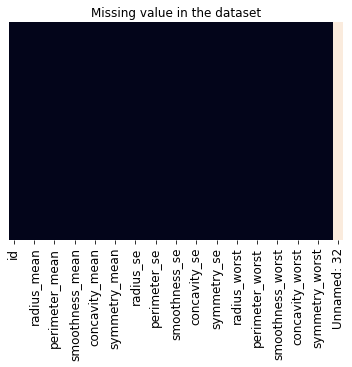

In [205]:
sns.heatmap(df.isnull(),cbar=False,yticklabels=False)
plt.title('Missing value in the dataset');

In [206]:
df.shape

(569, 33)

We have only 1 column (unamed-32) which is blank. So we are Removing the column Unnamed-32.

We are dropping Id column also.

In [207]:
df.drop(["Unnamed: 32","id"],axis=1,inplace=True)

In [208]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

#EDA

In [209]:
X=df.copy()
y=X.pop('diagnosis')

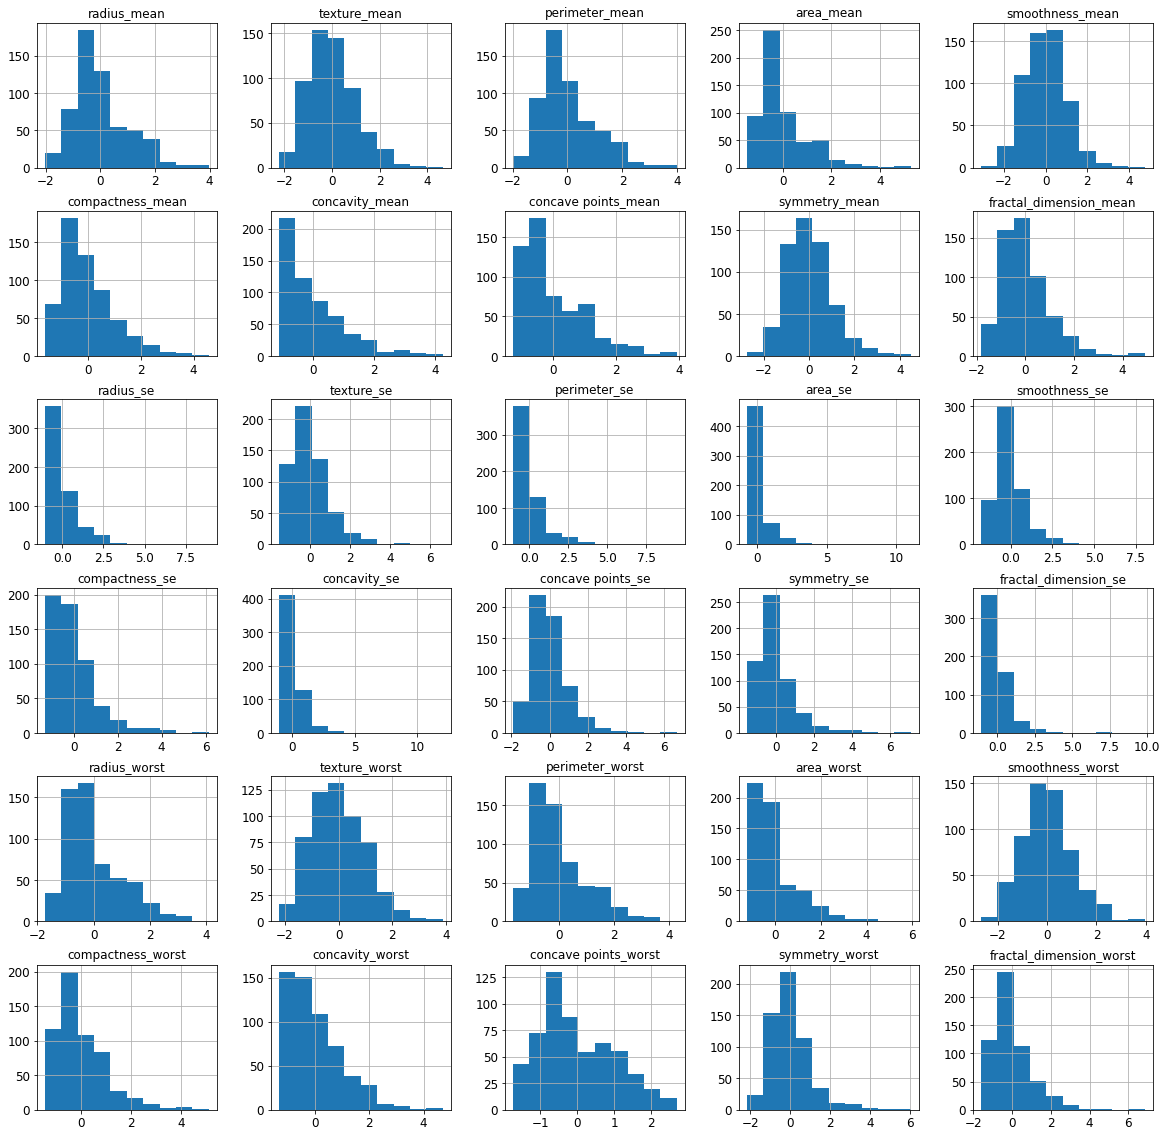

In [210]:
X_norm=(X - X.mean()) / (X.std()) 
X_norm=X_norm.join(y)
X_norm.hist(figsize=(20,20))
plt.show()

In [211]:
pt1=X_norm.iloc[:,0:10].join(X_norm.diagnosis)
pt2=X_norm.iloc[:,10:20].join(X_norm.diagnosis)
pt3=X_norm.iloc[:,20:30].join(X_norm.diagnosis)

X_mlt1=pt1.melt(id_vars='diagnosis', value_vars=pt1.columns)
X_mlt2=pt2.melt(id_vars='diagnosis', value_vars=pt2.columns)
X_mlt3=pt3.melt(id_vars='diagnosis', value_vars=pt3.columns)

In [212]:
def swarm(df):
    plt.figure(figsize=(10,10))
    sns.swarmplot(x='variable',y='value',hue='diagnosis',data=df)
    plt.xticks(rotation=90)
    return plt.show()

In [213]:
def violin(df):
    plt.figure(figsize=(10,10))
    sns.violinplot(x='variable',y='value',hue='diagnosis',data=df,split=True, inner='quart')
    plt.xticks(rotation=90)
    return plt.show()

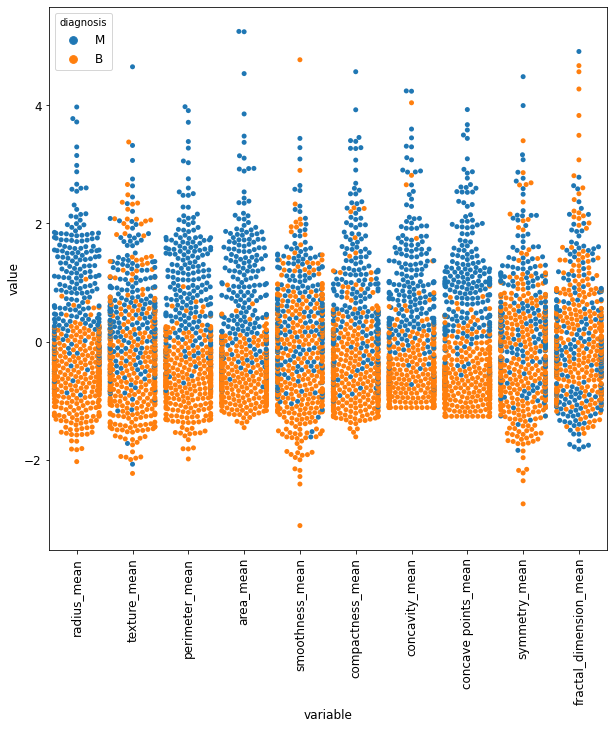

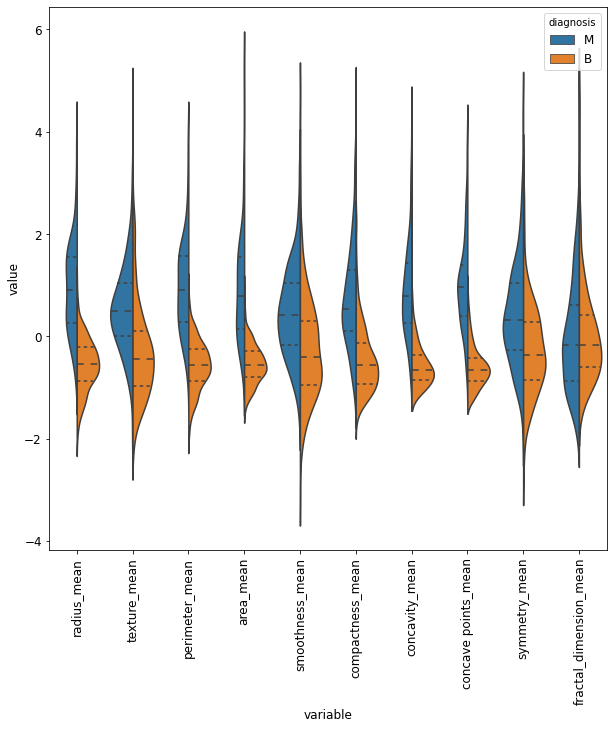

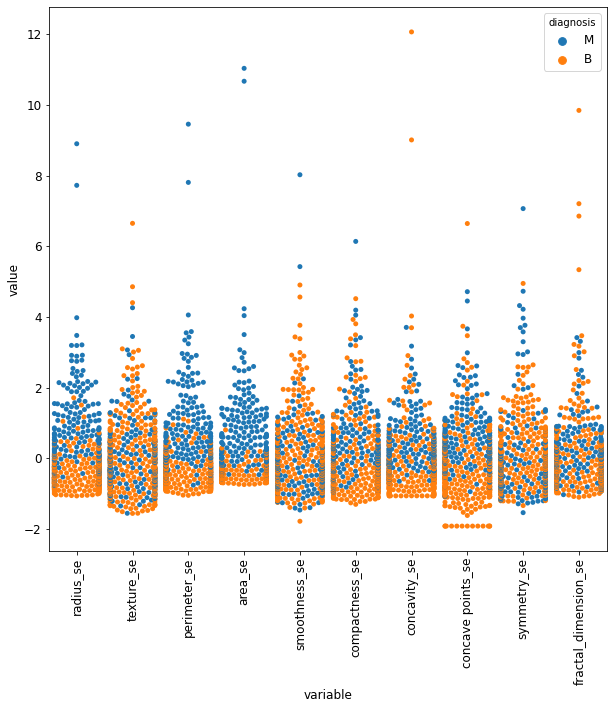

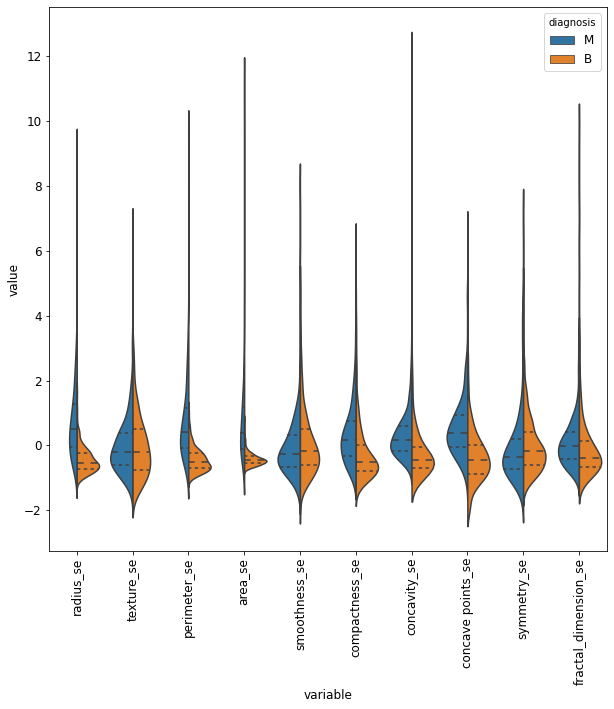

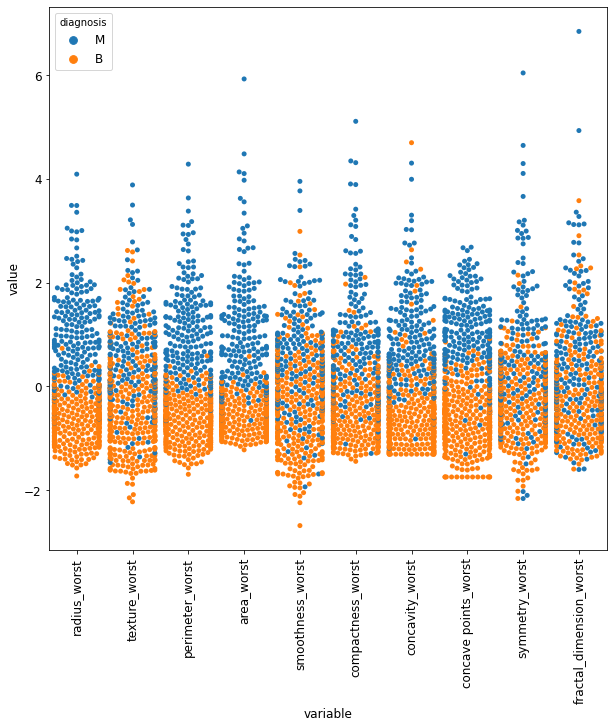

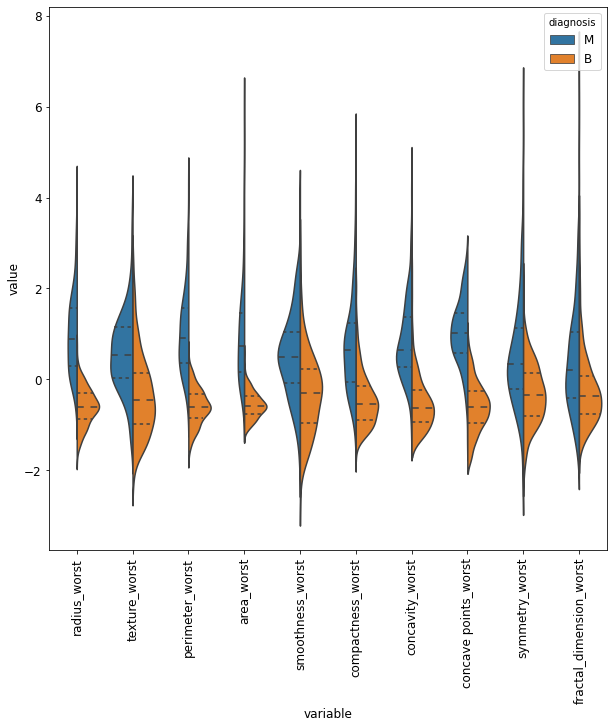

In [214]:
plt.rc('xtick', labelsize=12)    # fontsize of the tick labels
plt.rc('ytick', labelsize=12)
plt.rc('axes', labelsize=12) # fontsize of the x and y labels
plt.rc('legend', fontsize=12)    # legend fontsize
swarm(X_mlt1)
violin(X_mlt1)
swarm(X_mlt2)
violin(X_mlt2)
swarm(X_mlt3)
violin(X_mlt3)

**Observations:**
1. Lot of data is Screwed.

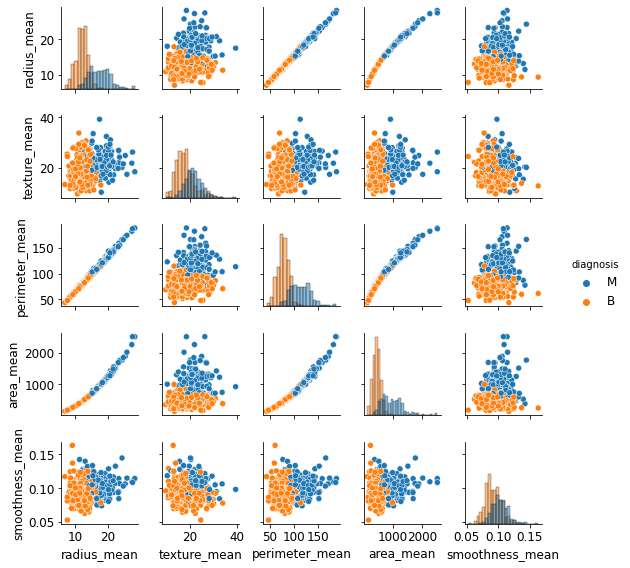

In [215]:
sns.pairplot(df.iloc[:,:6],hue='diagnosis', diag_kind='hist',height=1.6)

#Feature Selection

In [216]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis']) # M:1, B:0
df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

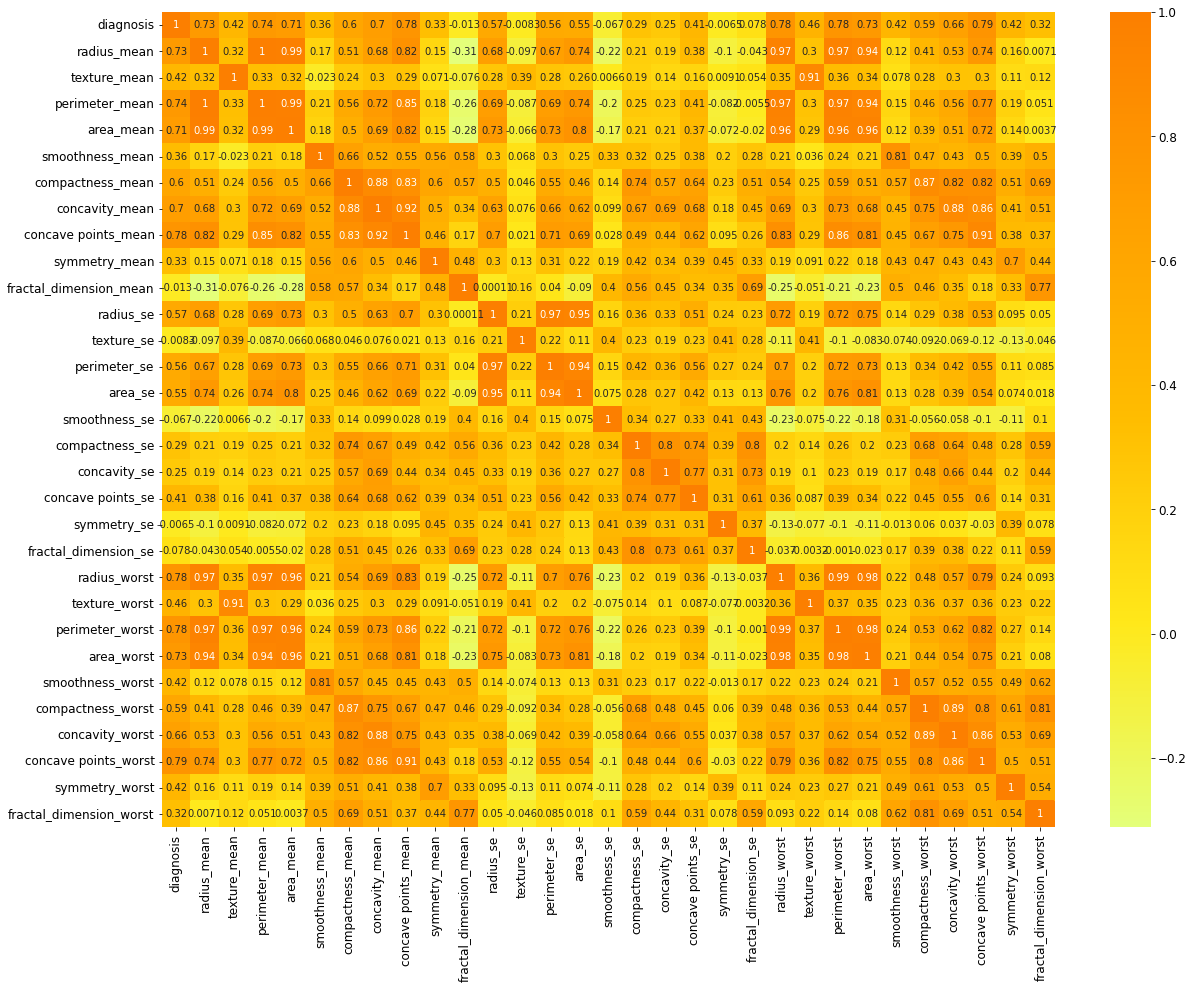

In [217]:
corr = df.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr, cmap = 'Wistia', annot= True);

In [218]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis']) # M:1, B:0
df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [219]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [220]:
corr_features = correlation(df, 0.85)
len(set(corr_features))

13

In [221]:
corr_features

{'area_mean',
 'area_se',
 'area_worst',
 'compactness_worst',
 'concave points_mean',
 'concave points_worst',
 'concavity_mean',
 'concavity_worst',
 'perimeter_mean',
 'perimeter_se',
 'perimeter_worst',
 'radius_worst',
 'texture_worst'}

In [222]:
df.drop(corr_features,axis=1,inplace=True)

13 features are highly correlated to each other so we dropped them.

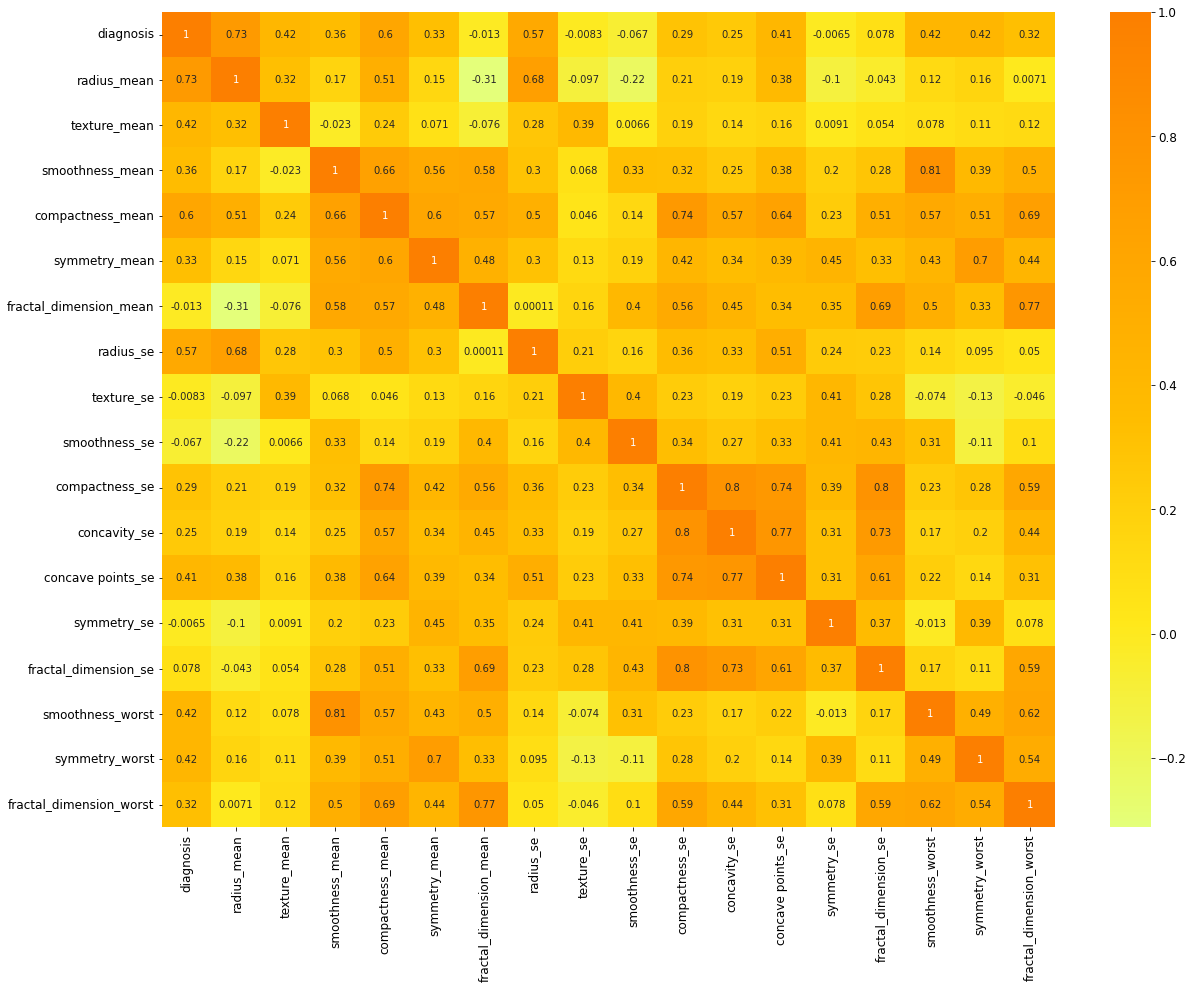

In [223]:
corr = df.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr, cmap = 'Wistia', annot= True);

I have checked manually some columns are not highly correlated to target featrue, I am dropping them.

In [224]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'smoothness_se', 'compactness_se',
       'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'smoothness_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')

In [225]:
df.drop(["fractal_dimension_mean","texture_se","symmetry_mean"],axis=1,inplace=True)

In [226]:
df.shape

(569, 15)

#Feature Scaling

As we have seen there are outliers in the dataset and we are not going to remove them because they can affect our prediction result. So in Feature Scaling we are using RobustScaler which are robust to outliers.

In [227]:
df1=df.copy()
x=df1.drop(["diagnosis"],axis=1,inplace=True)
y=df["diagnosis"]

In [93]:
scale = RobustScaler()
df = scale.fit_transform(df)
df = scale.transform(df)

#Models

In [94]:
from sklearn.model_selection import train_test_split

In [230]:
x_train,x_test,y_train,y_test=train_test_split(
    X,y,test_size=0.2,random_state=0
)

Logistic Regression

In [234]:
from sklearn.linear_model import LogisticRegression
classifir_lr=LogisticRegression(random_state=0)# here we are succefull created a instance of the class
classifir_lr.fit(x_train,y_train)
y_pred=classifir_lr.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,precision_score,recall_score


In [241]:
from sklearn.model_selection import cross_val_score

In [235]:
acc = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
prec = precision_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)

In [236]:
results=pd.DataFrame([['Logistic Regression',acc,f1,prec,rec]],
                    columns=['Model','Accuracy','f1 score','precision','recall'])

In [237]:
results

,Model,Accuracy,f1 score,precision,recall
0,Logistic Regression,0.947368,0.9375,0.918367,0.957447


Logistic Regression with cross-validation

In [242]:
accuracies= cross_val_score(estimator=classifir_lr,X=x_train,y=y_train,cv=10)

In [243]:
print("Accuracy is {:.2f}%".format(accuracies.mean()*100))
print("Standard Deviation is {:.2f}%".format(accuracies.std()*100))

Accuracy is 94.08%
Standard Deviation is 3.76%


Random Forest

In [238]:
from sklearn.ensemble import RandomForestClassifier
classifier_rm=RandomForestClassifier(random_state=0)
classifier_rm.fit(x_train,y_train)
y_pred=classifier_rm.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,precision_score,recall_score
acc = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
prec = precision_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)


In [239]:
model_results=pd.DataFrame([['Random forest',acc,f1,prec,rec]],
                    columns=['Model','Accuracy','f1 score','precision','recall'])

In [240]:
results.append(model_results,ignore_index=True)


,Model,Accuracy,f1 score,precision,recall
0,Logistic Regression,0.947368,0.937500,0.918367,0.957447
1,Random forest,0.964912,0.958333,0.938776,0.978723


Random forest with cross validation

In [244]:
accuracies= cross_val_score(estimator=classifier_rm,X=x_train,y=y_train,cv=10)


In [245]:
print("Accuracy is {:.2f}%".format(accuracies.mean()*100))
print("Standard Deviation is {:.2f}%".format(accuracies.std()*100))

Accuracy is 96.05%
Standard Deviation is 3.07%


Random Forest is performing best model for this , With 96% Accuracy.